In [71]:
from urllib.request import urlopen
from lxml import etree
import pandas as pd
import matplotlib.pyplot as plt
import re

# Billboard Top 200 URL
URL = "https://www.billboard.com/charts/billboard-global-200/"

In [72]:
response = urlopen(URL)
htmlparser = etree.HTMLParser()
tree = etree.parse(response, htmlparser)

xpath_song = f'//div[@class="o-chart-results-list-row-container"]/ul/li[4]/ul/li[1]/h3'
xpath_artist = f'//div[@class="o-chart-results-list-row-container"]/ul/li[4]/ul/li[1]/span'
song_elements = tree.xpath(xpath_song)
artist_elements = tree.xpath(xpath_artist)

dataframe = pd.DataFrame(columns=['Song', 'Artist'])
for i in range(200):
    song_text = song_elements[i].text.strip().replace('\n', ' ').replace('  ', ' ')
    artist_text = artist_elements[i].text.strip().replace('\n', ' ').replace('  ', ' ')
    artist_text = re.split(r' & | Featuring ', artist_text)
    dataframe.loc[i] = [song_text, artist_text]
    
    

# Flatten the list of artists
all_artists = [artist for sublist in dataframe['Artist'] for artist in sublist]

# Count the occurrences of each artist
artist_counts = pd.Series(all_artists).value_counts()

dataframe

,Song,Artist
0,APT.,"[ROSE, Bruno Mars]"
1,All I Want For Christmas Is You,[Mariah Carey]
2,Die With A Smile,"[Lady Gaga, Bruno Mars]"
3,Last Christmas,[Wham!]
4,Luther,"[Kendrick Lamar, SZA]"
...,...,...
195,St. Chroma,"[Tyler, The Creator, Daniel Caesar]"
196,Stay,"[The Kid LAROI, Justin Bieber]"
197,Apocalypse,[Cigarettes After Sex]
198,Fairytale Of New York,"[The Pogues, Kirsty MacColl]"


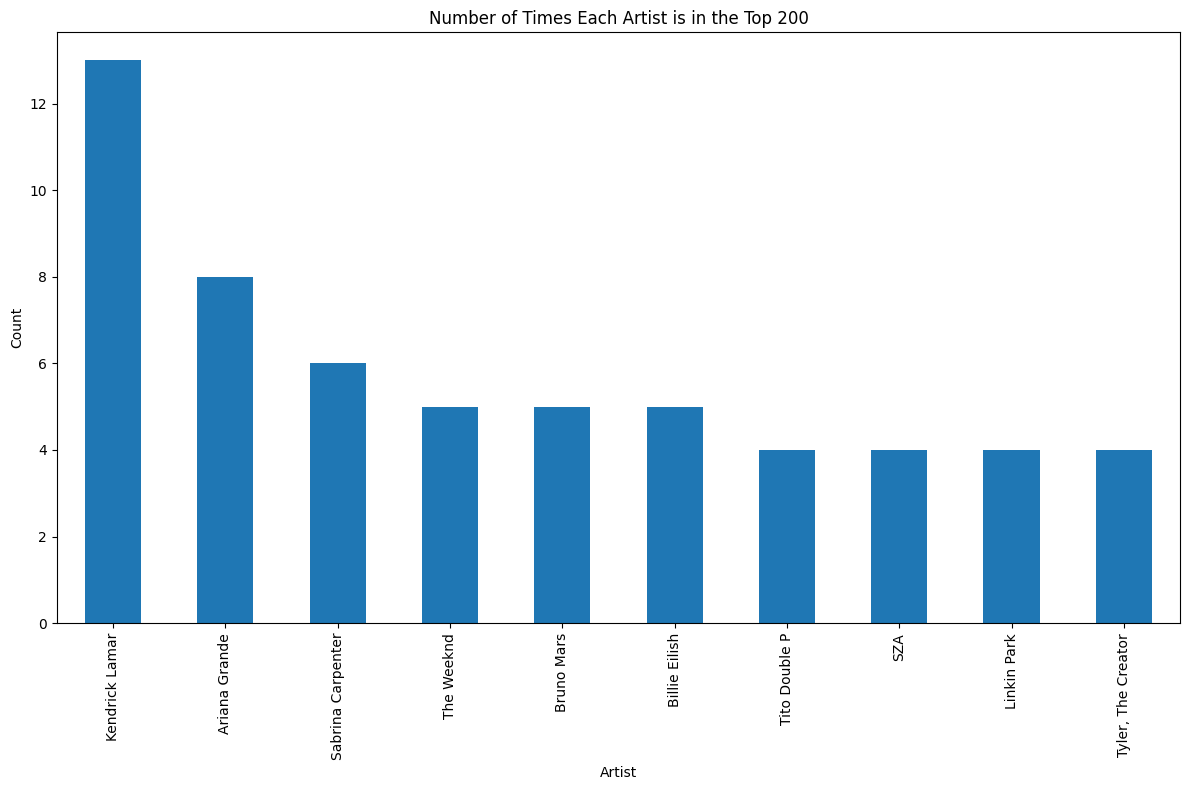

In [73]:
# Plot the data
plt.figure(figsize=(12, 8))
artist_counts.head(10).plot(kind='bar')
plt.title('Number of Times Each Artist is in the Top 200')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()